In [4]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('tennisdata.csv')
print("THe first 5 values of data is :\n",data.head())
X = data.iloc[:,:-1]
print("\nThe First 5 values of train data is\n",X.head())
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)
le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)
le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)
le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)
print("\nNow the Train data is :\n",X.head())
le_PlayTennis = LabelEncoder()
y = data['PlayTennis']
y = le_PlayTennis.fit_transform(y) 
print("\nNow the Train output is\n",y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

THe first 5 values of data is :
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes

The First 5 values of train data is
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

Now the Train data is :
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1      0

Now the Train output is
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Accuracy is: 0.6666666666666666


G:\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Accuracy: 0.24
KMeans Confusion Matrix:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


G:\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GMM Accuracy: 0.03333333333333333
GMM Confusion Matrix:
 [[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]


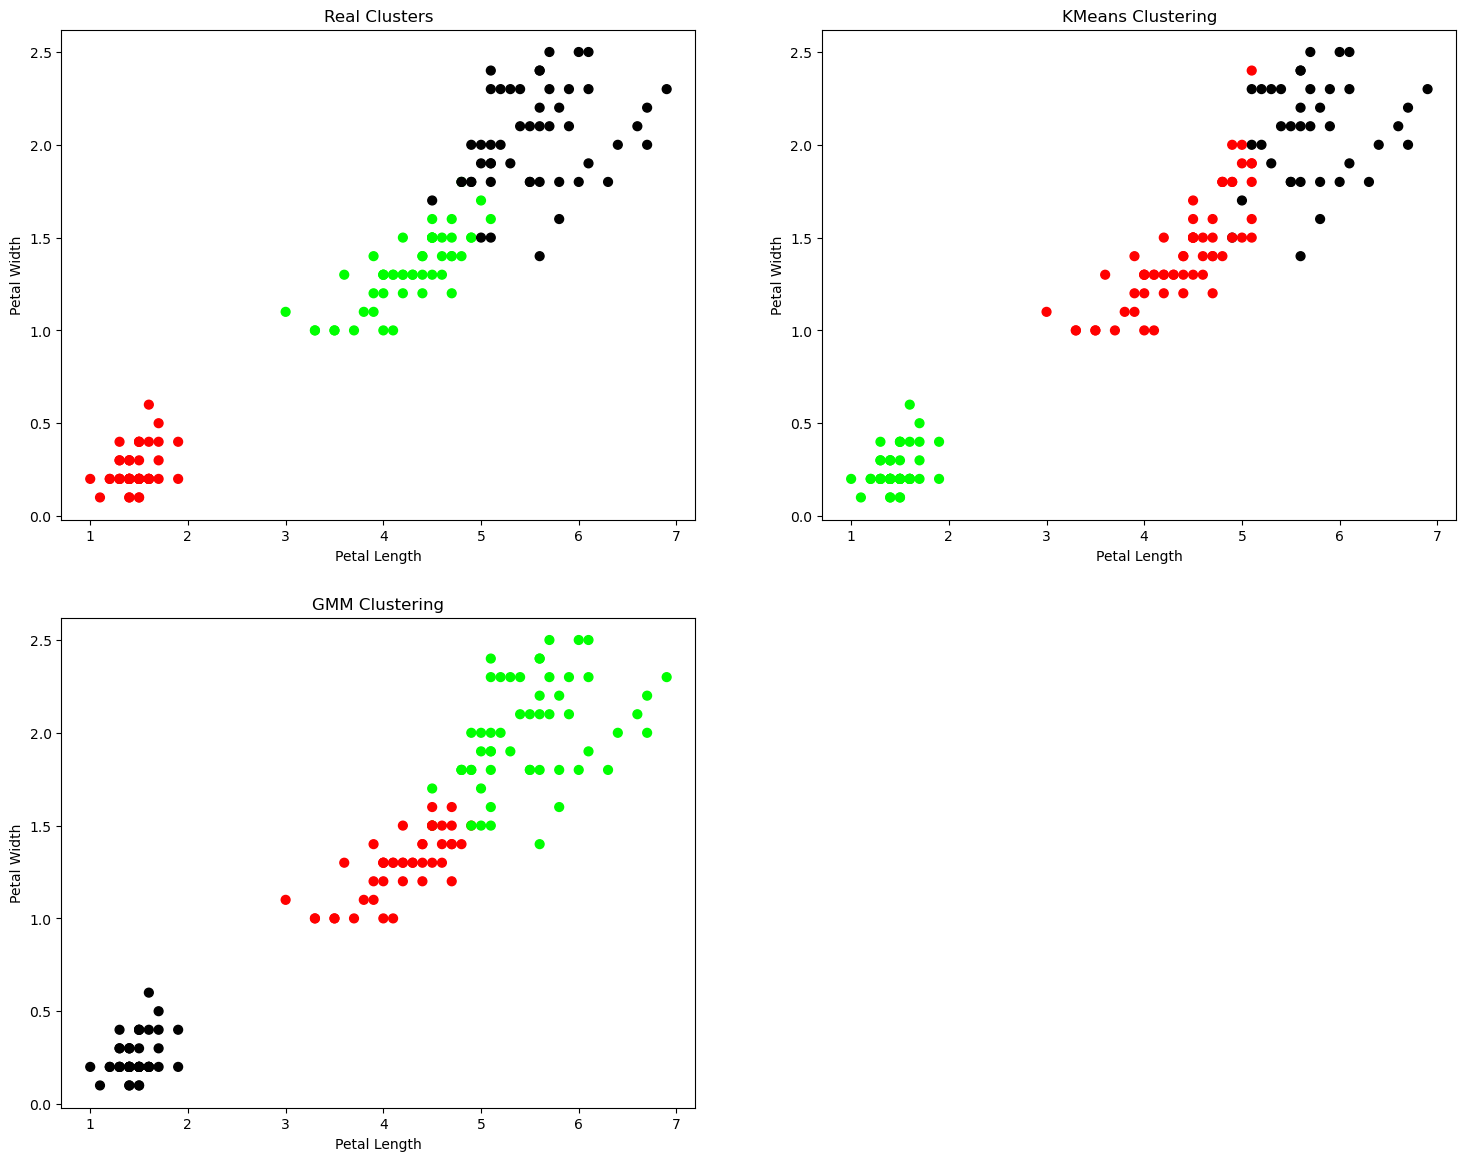

Observation: GMM-based clustering matched the true labels more closely than KMeans.


In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import os
os.environ['OMP_NUM_THREADS'] = '1'
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['target']
model = KMeans(n_clusters=3, n_init=10) 
model.fit(X)
plt.figure(figsize=(18, 14))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(2, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title('KMeans Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
kmeans_accuracy = sm.accuracy_score(y, model.labels_)
print("KMeans Accuracy:", kmeans_accuracy)
print("KMeans Confusion Matrix:\n", sm.confusion_matrix(y, model.labels_))
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.petal_length, X.petal_width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
gmm_accuracy = sm.accuracy_score(y, gmm_y)
print("GMM Accuracy:", gmm_accuracy)
print("GMM Confusion Matrix:\n", sm.confusion_matrix(y, gmm_y))
plt.show()
print("Observation: GMM-based clustering matched the true labels more closely than KMeans.")
